# 1. 데이터 로딩

In [124]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from tqdm import tqdm  #상태진행률 표시
import matplotlib.pyplot as plt 
import os  #이건 뭐니 
import warnings
warnings.filterwarnings("ignore")  #분석에 문제없으면 경고표시 없애기 


train=pd.read_csv("log_train.csv")
label2012=pd.read_csv("label.csv")

- 데이터 살펴보기 

In [125]:
train.head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.61
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.32
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.50


In [126]:
train.shape

(780502, 9)

In [127]:
train.info()  #결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780502 entries, 0 to 780501
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   order_id     780502 non-null  object 
 1   product_id   780502 non-null  object 
 2   description  780502 non-null  object 
 3   quantity     780502 non-null  int64  
 4   order_date   780502 non-null  object 
 5   price        780502 non-null  float64
 6   customer_id  780502 non-null  int64  
 7   country      780502 non-null  object 
 8   total        780502 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 53.6+ MB


- ### 월 단위로 구분

In [128]:
def plus_month(df):
    df['order_date_month']=df['order_date'].str.slice(stop=7)
    

plus_month(train)


- ### 사용 안할 피처 삭제

In [129]:
def feature_drop(df):
#     df.drop('description',axis=1, inplace=True)  # 
#     df.drop('product_id', axis=1, inplace=True)  # 제
    df.drop('order_date', axis=1, inplace=True)  #구매날짜 삭제--> 월단위로 했으므로 삭제
    
feature_drop(train)

- ### 환불과 구매 가격 구분하기 

In [130]:
train['refund_total']=train['total'].apply(lambda x: 0 if x>=0 else x)  # 환불금액
train['purchase_total']=train['total'].apply(lambda x: 0 if x<0 else x)  # 구매금액 


- ### 월별로 total

In [131]:
train=train.groupby(['customer_id','order_date_month']).sum().reset_index()
train.head()

,customer_id,order_date_month,quantity,price,total,refund_total,purchase_total
0,12346,2009-12,26,31.3500,187.2750,0.000,187.2750
1,12346,2010-01,19,200.4750,-22.2750,-170.775,148.5000
2,12346,2010-03,5,44.6325,44.6325,0.000,44.6325
3,12346,2010-06,5,647.4105,-285.9285,-520.740,234.8115
4,12346,2010-10,-2,9.0750,-9.0750,-9.075,0.0000


- 연도/ 월 구분 + 숫자형으로 바꿔줌 

In [132]:

train['year']=train['order_date_month'].apply(lambda x: int(str(x).split('-')[0]))

train['month']=train['order_date_month'].apply(lambda x: int(str(x).split('-')[1]))

train.head()  

#결국 total(refund+purchase)가 300이 넘어야 함 

,customer_id,order_date_month,quantity,price,total,refund_total,purchase_total,year,month
0,12346,2009-12,26,31.3500,187.2750,0.000,187.2750,2009,12
1,12346,2010-01,19,200.4750,-22.2750,-170.775,148.5000,2010,1
2,12346,2010-03,5,44.6325,44.6325,0.000,44.6325,2010,3
3,12346,2010-06,5,647.4105,-285.9285,-520.740,234.8115,2010,6
4,12346,2010-10,-2,9.0750,-9.0750,-9.075,0.0000,2010,10


In [135]:
# 과거 구매기록과의 상관관계를 기반으로 예측 변수 선택

# 연도 
# 일년전 
# 한달전 
# 두달전 
# 세달전 
# 전체 평균 




In [136]:
train.head()

,customer_id,order_date_month,quantity,price,total,refund_total,purchase_total,year,month
0,12346,2009-12,26,31.3500,187.2750,0.000,187.2750,2009,12
1,12346,2010-01,19,200.4750,-22.2750,-170.775,148.5000,2010,1
2,12346,2010-03,5,44.6325,44.6325,0.000,44.6325,2010,3
3,12346,2010-06,5,647.4105,-285.9285,-520.740,234.8115,2010,6
4,12346,2010-10,-2,9.0750,-9.0750,-9.075,0.0000,2010,10


In [137]:
# def past_function(df, name, past):
    

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       26307 non-null  int64  
 1   order_date_month  26307 non-null  object 
 2   quantity          26307 non-null  int64  
 3   price             26307 non-null  float64
 4   total             26307 non-null  float64
 5   refund_total      26307 non-null  float64
 6   purchase_total    26307 non-null  float64
 7   year              26307 non-null  int64  
 8   month             26307 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 1.8+ MB


In [140]:
train.head(5)

,customer_id,order_date_month,quantity,price,total,refund_total,purchase_total,year,month
0,12346,2009-12,26,31.3500,187.2750,0.000,187.2750,2009,12
1,12346,2010-01,19,200.4750,-22.2750,-170.775,148.5000,2010,1
2,12346,2010-03,5,44.6325,44.6325,0.000,44.6325,2010,3
3,12346,2010-06,5,647.4105,-285.9285,-520.740,234.8115,2010,6
4,12346,2010-10,-2,9.0750,-9.0750,-9.075,0.0000,2010,10


- ### 환불/ 구매 데이터 구분

In [141]:
refund_train=train.loc[:,['customer_id','order_date_month','refund_total','year','month']]

purchase_train=train.loc[:,['customer_id','order_date_month','purchase_total','year','month']]

In [142]:
# refund_train.head(60)

In [143]:
# purchase_train.head(60)

- ### 시간데이터 추가해 주는 함수( n개월 전 피처 추가 )

In [144]:
#시간데이터 추가해 주는 함수( n개월 전 피처 추가 )

def before_functiion(df, var_name, past):
    
    df.reset_index(drop=True, inplace=True)
    
    #변수 생성 
    df['before'+str(past)+'month_'+var_name]=np.nan
    
    for i in range(0, (max(df.index)+1)):  #처음부터 끝까지 모든 행에서 반복
    
    
    #1년전 이상의 데이터를 구할 경우 
        if past>=12:
#         for i in range(0, (max(df.index)+1)):  #처음부터 끝까지 모든 행에서 
            val=df.loc[(df['customer_id']==df['customer_id'][i])&  #customer_id 가 같고 
                      (df['year']==df['year'][i]-1)&  #일년전 데이터의 
                      (df['month']==df['month'][i]+12-past), var_name]
    
            if len(val) !=0:
                df.loc[i,'before'+str(past)+'month_'+var_name]=val.iloc[0]
  

    # 1년 이내의 데이터일 경우
        elif past<12:
#             for i in range(0, (max(df.index)+1)):
            
            if df['month'][i]>past:
                val=df.loc[(df['customer_id']==df['customer_id'][i])&  #customer_id 가 같고 
                           (df['year']==df['year'][i])&  #연도가 같고
                          (df['month']==df['month'][i]-past), var_name]  # 
                if len(val) !=0:
                    df.loc[i,'before'+str(past)+'month_'+var_name]=val.iloc[0]
            
            elif df['month'][i]<=past:
                val=df.loc[(df['customer_id']==df['customer_id'][i])&  #customer_id 가 같고 
                           (df['year']==df['year'][i]-1)&   # 연도가 1년전 
                           (df['month']==df['month'][i]+12-past), var_name] 
                if len(val) !=0:
                    df.loc[i,'before'+str(past)+'month_'+var_name]=val.iloc[0]
        

    return df
    

- ### 피처 추가: 1/2/3개월 전 데이터 , 1년전 데이터 추가 

In [145]:
#1/2/3개월 전 데이터 , 1년전 데이터 추가 

before_functiion(refund_train, "refund_total", 1)  #1개월전 환불 데이터
before_functiion(refund_train, "refund_total", 2)
before_functiion(refund_train, "refund_total", 3)
before_functiion(refund_train, "refund_total", 12)

,customer_id,order_date_month,refund_total,year,month,before1month_refund_total,before2month_refund_total,before3month_refund_total,before12month_refund_total
0,12346,2009-12,0.000,2009,12,NaN,NaN,NaN,NaN
1,12346,2010-01,-170.775,2010,1,0.0,NaN,NaN,NaN
2,12346,2010-03,0.000,2010,3,NaN,-170.775,0.0,NaN
3,12346,2010-06,-520.740,2010,6,NaN,NaN,0.0,NaN
4,12346,2010-10,-9.075,2010,10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
26302,18287,2010-05,0.000,2010,5,NaN,NaN,NaN,NaN
26303,18287,2010-09,0.000,2010,9,NaN,NaN,NaN,NaN
26304,18287,2010-11,0.000,2010,11,NaN,0.000,NaN,NaN
26305,18287,2011-05,0.000,2011,5,NaN,NaN,NaN,0.0


In [146]:
#1/2/3개월 전 데이터 , 1년전 데이터 추가 

before_functiion(purchase_train, "purchase_total", 1)
before_functiion(purchase_train, "purchase_total", 2)
before_functiion(purchase_train, "purchase_total", 3)
before_functiion(purchase_train, "purchase_total", 12)

,customer_id,order_date_month,purchase_total,year,month,before1month_purchase_total,before2month_purchase_total,before3month_purchase_total,before12month_purchase_total
0,12346,2009-12,187.2750,2009,12,NaN,NaN,NaN,NaN
1,12346,2010-01,148.5000,2010,1,187.275,NaN,NaN,NaN
2,12346,2010-03,44.6325,2010,3,NaN,148.50,187.2750,NaN
3,12346,2010-06,234.8115,2010,6,NaN,NaN,44.6325,NaN
4,12346,2010-10,0.0000,2010,10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
26302,18287,2010-05,1768.1565,2010,5,NaN,NaN,NaN,NaN
26303,18287,2010-09,1472.7900,2010,9,NaN,NaN,NaN,NaN
26304,18287,2010-11,629.4750,2010,11,NaN,1472.79,NaN,NaN
26305,18287,2011-05,1262.7120,2011,5,NaN,NaN,NaN,1768.1565


In [147]:
# 결측치 확인

refund_train.isnull().sum()

customer_id                       0
order_date_month                  0
refund_total                      0
year                              0
month                             0
before1month_refund_total     15984
before2month_refund_total     16634
before3month_refund_total     17369
before12month_refund_total    21561
dtype: int64

In [148]:
purchase_train.isnull().sum()

customer_id                         0
order_date_month                    0
purchase_total                      0
year                                0
month                               0
before1month_purchase_total     15984
before2month_purchase_total     16634
before3month_purchase_total     17369
before12month_purchase_total    21561
dtype: int64

In [149]:
refund_train

,customer_id,order_date_month,refund_total,year,month,before1month_refund_total,before2month_refund_total,before3month_refund_total,before12month_refund_total
0,12346,2009-12,0.000,2009,12,NaN,NaN,NaN,NaN
1,12346,2010-01,-170.775,2010,1,0.0,NaN,NaN,NaN
2,12346,2010-03,0.000,2010,3,NaN,-170.775,0.0,NaN
3,12346,2010-06,-520.740,2010,6,NaN,NaN,0.0,NaN
4,12346,2010-10,-9.075,2010,10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
26302,18287,2010-05,0.000,2010,5,NaN,NaN,NaN,NaN
26303,18287,2010-09,0.000,2010,9,NaN,NaN,NaN,NaN
26304,18287,2010-11,0.000,2010,11,NaN,0.000,NaN,NaN
26305,18287,2011-05,0.000,2011,5,NaN,NaN,NaN,0.0


- ## refund값을 다 양수로 바꾸겠음

In [150]:
refund_train.refund_total=abs(refund_train.refund_total)
refund_train.before1month_refund_total=abs(refund_train.before1month_refund_total)
refund_train.before2month_refund_total=abs(refund_train.before2month_refund_total)
refund_train.before3month_refund_total=abs(refund_train.before3month_refund_total)
refund_train.before12month_refund_total=abs(refund_train.before12month_refund_total)




In [151]:
refund_train

,customer_id,order_date_month,refund_total,year,month,before1month_refund_total,before2month_refund_total,before3month_refund_total,before12month_refund_total
0,12346,2009-12,0.000,2009,12,NaN,NaN,NaN,NaN
1,12346,2010-01,170.775,2010,1,0.0,NaN,NaN,NaN
2,12346,2010-03,0.000,2010,3,NaN,170.775,0.0,NaN
3,12346,2010-06,520.740,2010,6,NaN,NaN,0.0,NaN
4,12346,2010-10,9.075,2010,10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
26302,18287,2010-05,0.000,2010,5,NaN,NaN,NaN,NaN
26303,18287,2010-09,0.000,2010,9,NaN,NaN,NaN,NaN
26304,18287,2010-11,0.000,2010,11,NaN,0.000,NaN,NaN
26305,18287,2011-05,0.000,2011,5,NaN,NaN,NaN,0.0


### 결측치  처리
- 12개월전 데이터에서 결측치가 매우 많음 --> 2009, 2010년 데이터의 경우 1년 전 데이터가 없으므로 결측치가 더욱 더 폭발    
  
    
      
         
           
- 2009년과 2010년에서 1년전의 데이터는 2011년데이터로 대체  
- 2009년12월 ,2010년1,2월의 3개월 전 데이터-> 2010년 9월, 2010년 10월, 2010년 11월로 대체  
- 2009년12월 ,2010년1월의 2개월 전 데이터-> 2010년 10월, 2010년 11월로 대체  
- 2009년12월의 1개월 전 데이터-> 2010년 11월 데이터로 대체  
      
        
          
            
      
        
- 나머지 결측치는 0으로 두는게 좋을까 아니면 다른 값으로 채우는 게 좋을까 ?????
- 구매나 환불을 안했다는 거니까 일단은 0으로 채운 후에 학습 진행 

In [103]:
refund_train.head(30)

refund_2010_temp=pd.DataFrame((refund_train[(refund_train['year']==2010)&(refund_train['month']!=12)]).before12month_refund_total)
print(refund_2010_temp)
print(refund_2010_temp.isnull().sum()) 
#2010년 11월까지의 12개월 전 피처는 전부 na임을 확인

       before12month_refund_total
1                             NaN
2                             NaN
3                             NaN
4                             NaN
6                             NaN
...                           ...
26299                         NaN
26300                         NaN
26302                         NaN
26303                         NaN
26304                         NaN

[12273 rows x 1 columns]
before12month_refund_total    12273
dtype: int64


In [104]:
refund_train[(refund_train['year']==2009)& (refund_train['month']==12)].isnull().sum()

customer_id                      0
order_date_month                 0
refund_total                     0
year                             0
month                            0
before1month_refund_total     1045
before2month_refund_total     1045
before3month_refund_total     1045
before12month_refund_total    1045
dtype: int64

In [105]:
# # 2009년 결측치 채우기 
# for i in range(0, (max(refund_train.index)+1)):
    
#     #2009년 데이터면  
#     if refund_train['year'][i]==2009:
#         temp= refund_train.loc[(refund_train['customer_id']==refund_train['customer_id'][i])&  #아이디 같고
#                                                                       (refund_train['year']==2010)&   # 연도 2010년 
#                                                                            (refund_train['month']==12), 'before12month_refund_total']
        
#     #값이 없는 경우에는 ..????
#     if refund_train['year'][i]==2009:
#         refund_train.loc['before12month_refund_total'][i]
    

- ### refund_train결측치 처리 

In [152]:
#2010년 데이터의 아이디당 평균 환불,,


#아이디당 refund 평균치 
temp_mean_refund=train.groupby(['customer_id']).mean().reset_index()
temp_mean_refund=temp_mean_refund.loc[:,['customer_id', 'refund_total']]
temp_mean_refund

,customer_id,refund_total
0,12346,-21342.2550
1,12347,0.0000
2,12348,0.0000
3,12349,-7.9695
4,12350,0.0000
...,...,...
5909,18283,0.0000
5910,18284,-41.2500
5911,18285,0.0000
5912,18286,-59.4000


- ### refund_train 2009년, ~2010년 11월 까지의 결측치 처리

In [153]:
refund_train.reset_index(drop=True, inplace=True)

for i in range(0, (max(refund_train.index)+1)):
    
    # 2009년 데이터면  전체의 평균 환불로 ..
    if refund_train['year'][i]==2009:
        refund_train['before12month_refund_total'][i]= temp_mean_refund.loc[temp_mean_refund['customer_id']==refund_train['customer_id'][i],'refund_total']
        refund_train['before1month_refund_total'][i]= temp_mean_refund.loc[temp_mean_refund['customer_id']==refund_train['customer_id'][i],'refund_total']
        refund_train['before2month_refund_total'][i]= temp_mean_refund.loc[temp_mean_refund['customer_id']==refund_train['customer_id'][i],'refund_total']
        refund_train['before3month_refund_total'][i]= temp_mean_refund.loc[temp_mean_refund['customer_id']==refund_train['customer_id'][i],'refund_total']
        
    # 데이터 구할 수 없는것도 그냥 전체 평균으로 
    elif refund_train['year'][i]==2010 & refund_train['month'][i]<=1:
        refund_train['before12month_refund_total'][i]= temp_mean_refund.loc[temp_mean_refund['customer_id']==refund_train['customer_id'][i],'refund_total']
        refund_train['before3month_refund_total'][i]= temp_mean_refund.loc[temp_mean_refund['customer_id']==refund_train['customer_id'][i],'refund_total']
        refund_train['before2month_refund_total'][i]= temp_mean_refund.loc[temp_mean_refund['customer_id']==refund_train['customer_id'][i],'refund_total']
    
    elif refund_train['year'][i]==2010 & refund_train['month'][i]<=2:   
        refund_train['before12month_refund_total'][i]= temp_mean_refund.loc[temp_mean_refund['customer_id']==refund_train['customer_id'][i],'refund_total']
        refund_train['before3month_refund_total'][i]=temp_mean_refund.loc[temp_mean_refund['customer_id']==refund_train['customer_id'][i],'refund_total']
    
    elif refund_train['year'][i]==2010 & refund_train['month'][i]<=11:   
        refund_train['before12month_refund_total'][i]= temp_mean_refund.loc[temp_mean_refund['customer_id']==refund_train['customer_id'][i],'refund_total']
        

In [154]:
#나머지는 0으로 채웠음 ㅠ ㅠ

refund_train.isnull().sum()
refund_train=refund_train.fillna(0)

- ### purchase_train 결측치 처리 

In [155]:
temp_mean_purchase=purchase_train.groupby(['customer_id']).mean().reset_index()
temp_mean_purchase=temp_mean_purchase.loc[:,['customer_id', 'purchase_total']]
temp_mean_purchase

,customer_id,purchase_total
0,12346,21328.026500
1,12347,1107.081643
2,12348,666.402000
3,12349,1461.467700
4,12350,551.760000
...,...,...
5909,18283,311.837308
5910,18284,761.772000
5911,18285,704.550000
5912,18286,713.036500


In [156]:
purchase_train.reset_index(drop=True, inplace=True)

for i in range(0, (max(purchase_train.index)+1)):
    
    # 2009년 데이터면  전체의 평균 환불로 ..
    if purchase_train['year'][i]==2009:
        purchase_train['before12month_purchase_total'][i]= temp_mean_purchase.loc[temp_mean_purchase['customer_id']==purchase_train['customer_id'][i],'purchase_total']
        purchase_train['before1month_purchase_total'][i]= temp_mean_purchase.loc[temp_mean_purchase['customer_id']==purchase_train['customer_id'][i],'purchase_total']
        purchase_train['before2month_purchase_total'][i]= temp_mean_purchase.loc[temp_mean_purchase['customer_id']==purchase_train['customer_id'][i],'purchase_total']
        purchase_train['before3month_purchase_total'][i]= temp_mean_purchase.loc[temp_mean_purchase['customer_id']==purchase_train['customer_id'][i],'purchase_total']
        
    # 데이터 구할 수 없는것도 그냥 전체 평균으로 
    elif purchase_train['year'][i]==2010 & purchase_train['month'][i]<=1:
        purchase_train['before12month_purchase_total'][i]= temp_mean_purchase.loc[temp_mean_purchase['customer_id']==purchase_train['customer_id'][i],'purchase_total']
        purchase_train['before3month_purchase_total'][i]= temp_mean_purchase.loc[temp_mean_purchase['customer_id']==purchase_train['customer_id'][i],'purchase_total']
        purchase_train['before2month_purchase_total'][i]= temp_mean_purchase.loc[temp_mean_purchase['customer_id']==purchase_train['customer_id'][i],'purchase_total']
    
    elif purchase_train['year'][i]==2010 & purchase_train['month'][i]<=2:   
        purchase_train['before12month_purchase_total'][i]= temp_mean_purchase.loc[temp_mean_purchase['customer_id']==purchase_train['customer_id'][i],'purchase_total']
        purchase_train['before3month_purchase_total'][i]=temp_mean_purchase.loc[temp_mean_purchase['customer_id']==purchase_train['customer_id'][i],'purchase_total']
    
    elif purchase_train['year'][i]==2010 & purchase_train['month'][i]<=11:   
        purchase_train['before12month_purchase_total'][i]= temp_mean_purchase.loc[temp_mean_purchase['customer_id']==purchase_train['customer_id'][i],'purchase_total']
        

In [157]:
purchase_train=purchase_train.fillna(0)

In [158]:
purchase_train

,customer_id,order_date_month,purchase_total,year,month,before1month_purchase_total,before2month_purchase_total,before3month_purchase_total,before12month_purchase_total
0,12346,2009-12,187.2750,2009,12,21328.0265,21328.0265,21328.0265,21328.0265
1,12346,2010-01,148.5000,2010,1,187.2750,0.0000,0.0000,0.0000
2,12346,2010-03,44.6325,2010,3,0.0000,148.5000,187.2750,0.0000
3,12346,2010-06,234.8115,2010,6,0.0000,0.0000,44.6325,0.0000
4,12346,2010-10,0.0000,2010,10,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...
26302,18287,2010-05,1768.1565,2010,5,0.0000,0.0000,0.0000,0.0000
26303,18287,2010-09,1472.7900,2010,9,0.0000,0.0000,0.0000,0.0000
26304,18287,2010-11,629.4750,2010,11,0.0000,1472.7900,0.0000,0.0000
26305,18287,2011-05,1262.7120,2011,5,0.0000,0.0000,0.0000,1768.1565


## 피처 스케일링   
- 년도-> 원핫 인코딩  
- before 변수-> standardscaler

- 연도 (원핫 인코딩)

In [159]:
purchase_train=pd.get_dummies(purchase_train, columns=['year'])
refund_train=pd.get_dummies(refund_train, columns=['year'])

In [160]:
 purchase_train

,customer_id,order_date_month,purchase_total,month,before1month_purchase_total,before2month_purchase_total,before3month_purchase_total,before12month_purchase_total,year_2009,year_2010,year_2011
0,12346,2009-12,187.2750,12,21328.0265,21328.0265,21328.0265,21328.0265,1,0,0
1,12346,2010-01,148.5000,1,187.2750,0.0000,0.0000,0.0000,0,1,0
2,12346,2010-03,44.6325,3,0.0000,148.5000,187.2750,0.0000,0,1,0
3,12346,2010-06,234.8115,6,0.0000,0.0000,44.6325,0.0000,0,1,0
4,12346,2010-10,0.0000,10,0.0000,0.0000,0.0000,0.0000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
26302,18287,2010-05,1768.1565,5,0.0000,0.0000,0.0000,0.0000,0,1,0
26303,18287,2010-09,1472.7900,9,0.0000,0.0000,0.0000,0.0000,0,1,0
26304,18287,2010-11,629.4750,11,0.0000,1472.7900,0.0000,0.0000,0,1,0
26305,18287,2011-05,1262.7120,5,0.0000,0.0000,0.0000,1768.1565,0,0,1


- ### target값 분포 확인 (로그변환)

<AxesSubplot:>

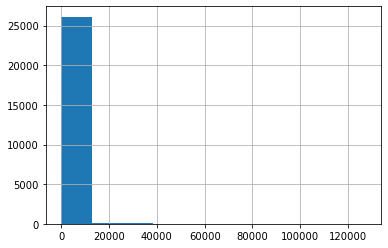

In [161]:
purchase_train.purchase_total.hist()   #로그 변환 해주겟음,,

<AxesSubplot:>

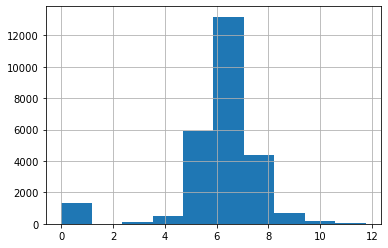

In [162]:
purchase_log_transform=np.log1p(purchase_train.purchase_total)
purchase_log_transform.hist()  

In [163]:
purchase_log_transform

0        5.237904
1        5.007296
2        3.820620
3        5.463033
4        0.000000
           ...   
26302    7.478258
26303    7.295593
26304    6.446474
26305    7.141809
26306    7.478622
Name: purchase_total, Length: 26307, dtype: float64

In [164]:
purchase_train.purchase_total=purchase_log_transform

In [165]:
purchase_train

,customer_id,order_date_month,purchase_total,month,before1month_purchase_total,before2month_purchase_total,before3month_purchase_total,before12month_purchase_total,year_2009,year_2010,year_2011
0,12346,2009-12,5.237904,12,21328.0265,21328.0265,21328.0265,21328.0265,1,0,0
1,12346,2010-01,5.007296,1,187.2750,0.0000,0.0000,0.0000,0,1,0
2,12346,2010-03,3.820620,3,0.0000,148.5000,187.2750,0.0000,0,1,0
3,12346,2010-06,5.463033,6,0.0000,0.0000,44.6325,0.0000,0,1,0
4,12346,2010-10,0.000000,10,0.0000,0.0000,0.0000,0.0000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
26302,18287,2010-05,7.478258,5,0.0000,0.0000,0.0000,0.0000,0,1,0
26303,18287,2010-09,7.295593,9,0.0000,0.0000,0.0000,0.0000,0,1,0
26304,18287,2010-11,6.446474,11,0.0000,1472.7900,0.0000,0.0000,0,1,0
26305,18287,2011-05,7.141809,5,0.0000,0.0000,0.0000,1768.1565,0,0,1


<AxesSubplot:>

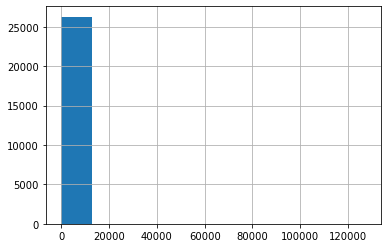

In [166]:
refund_train.refund_total.hist() 

<AxesSubplot:>

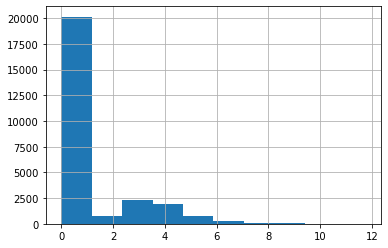

In [167]:
refund_log_transform=np.log1p(refund_train.refund_total)
refund_log_transform.hist()   #우째

In [168]:
refund_train.refund_total=refund_log_transform

In [169]:
refund_train

,customer_id,order_date_month,refund_total,month,before1month_refund_total,before2month_refund_total,before3month_refund_total,before12month_refund_total,year_2009,year_2010,year_2011
0,12346,2009-12,0.000000,12,-21342.255,-21342.255,-21342.255,-21342.255,1,0,0
1,12346,2010-01,5.146185,1,0.000,0.000,0.000,0.000,0,1,0
2,12346,2010-03,0.000000,3,0.000,170.775,0.000,0.000,0,1,0
3,12346,2010-06,6.257169,6,0.000,0.000,0.000,0.000,0,1,0
4,12346,2010-10,2.310057,10,0.000,0.000,0.000,0.000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
26302,18287,2010-05,0.000000,5,0.000,0.000,0.000,0.000,0,1,0
26303,18287,2010-09,0.000000,9,0.000,0.000,0.000,0.000,0,1,0
26304,18287,2010-11,0.000000,11,0.000,0.000,0.000,0.000,0,1,0
26305,18287,2011-05,0.000000,5,0.000,0.000,0.000,0.000,0,0,1


- ### customer_id 변수 standardscaler

In [280]:
# from sklearn.preprocessing import StandardScaler

# scaler=StandardScaler(refund_train.customer_id)
# scaler.fit(refund_train.customer_id)
# scaler.transform(refund_train.customer_id)

 ## 데이터 분할  
 - train_set: 2009~2011.10월 데이터 
 - test_set: 2011.11

In [170]:
# purchase
purchase_train_set=purchase_train.loc[purchase_train['order_date_month']!='2011-11']
purchase_test_set=purchase_train.loc[purchase_train['order_date_month']=='2011-11']

#refund
refund_train_set=refund_train.loc[refund_train['order_date_month']!='2011-11']
refund_test_set=refund_train.loc[refund_train['order_date_month']=='2011-11']

print(purchase_train_set.shape, purchase_test_set.shape, refund_train_set.shape, refund_test_set.shape)

(24596, 11) (1711, 11) (24596, 11) (1711, 11)


- ### order_date_month 열 삭제

In [171]:
purchase_train_set.drop('order_date_month', axis=1, inplace=True)
purchase_test_set.drop('order_date_month', axis=1, inplace=True)
refund_train_set.drop('order_date_month', axis=1, inplace=True)
refund_test_set.drop('order_date_month', axis=1, inplace=True)

print(purchase_train_set.shape, purchase_test_set.shape, refund_train_set.shape, refund_test_set.shape)

(24596, 10) (1711, 10) (24596, 10) (1711, 10)


# 평가지표

In [172]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, confusion_matrix
from sklearn.metrics import roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion=confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test, pred)
    #f1스코어 추가 
    f1=f1_score(y_test, pred)
    roc_auc=roc_auc_score(y_test, pred_proba)
    
    print('오차행렬')
    print(confusion)
    
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, f1스코어:{3:.4f},AUC:{4:.4f}'
          .format(accuracy,precision,recall,f1,roc_auc))
    
from sklearn.preprocessing import Binarizer


def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):  #실제값, 확률값?, 임계값
      # thresholdslist값을 객체 내의 값을 차례로 iteration하면서 evaluation수행 
    for custom_threshold in thresholds:  #임계값 차례대로 
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print("임계값:",custom_threshold)
        get_clf_eval(y_test, custom_predict)    
        
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker 
%matplotlib inline


def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 threshold에 따른 정밀도, 재현율, ndarray추출
    precisions, recalls, thresholds=precision_recall_curve(y_test, pred_proba_c1)
    
    #x축을 threshold값으로 , y축은 정밀도ㅡ 재현율 값으로 각각 plot수행
    #정밀도는 점선으로 표시 
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='-', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold값 x축의 scale을 0.1단위로 변경
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    #x축, y축 label과 legend, 그리고 grid설정
    plt.xlabel('Threshold value')
    plt.ylabel('precision and recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
    
def roc_curve_plot(y_test, pred_proba_c1):
    #임계값에 따른 fpr, tpr반환받음
    fprs, tprs, thresholds=roc_curve(y_test, pred_proba_c1)
    #ROC곡선을 그림 
    plt.plot(fprs, tprs, label='ROC')
    #가운데 직선 
    plt.plot([0,1],[0,1],'k-', label='Random')
    
    #FPR x축의 scale을 0.1단위로 변경 x,y축 명 설정
    start, end=plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-특이도)')
    plt.ylabel('TPR')
    plt.legend()

## train/ test 데이터셋  
- #### purchase  
purchase_train_set  (2009-12~2011-10)  
purchase_test_set  (2011-11)
  
    
      
        
- ##### refund  
refund_train_set  (2009-12~2011-10)  
refund_test_set  (2011-11)

# purchase 모델링1


- 랜덤포레스트 

In [173]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd 
import numpy as np 

#랜덤포레스트

##############################################33
# 데이터 로드 
y_target=purchase_train_set['purchase_total']
x_feature=purchase_train_set.drop(['purchase_total'], axis=1, inplace=False)


###############################################
# 랜덤포레스트 모델 
rf=RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores=cross_val_score(rf, x_feature, y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('교차 검증의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print(" 교차 검증 개별 RMSE scores:",np.round(rmse_scores,2))
print("교차 검증 평균 RMSE:{0:.3f}".format(avg_rmse))


교차 검증의 개별 Negative MSE scores: [-3.3  -2.76 -2.63 -2.66 -3.02]
 교차 검증 개별 RMSE scores: [1.82 1.66 1.62 1.63 1.74]
교차 검증 평균 RMSE:1.693


In [187]:
#테스트데이터(2011-11)
purchase_y_test=purchase_test_set['purchase_total']
purchase_x_test=purchase_test_set.drop(['purchase_total'], axis=1, inplace=False)



In [174]:
# 모델과 데이터를 입력받아 교차 검증으로 평균 rmse를 계산해 주는 함수 
def get_model_cv_prediction(model, x_data, y_target):
    neg_mse_scores=cross_val_score(model, x_data, y_target, scoring='neg_mean_squared_error',cv=5)
    rmse_scores=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    print("####",model.__class__.__name__,'####')
    print("교차 검증의 평균 RMSE:{0:.3f}".format(avg_rmse))


- DT, GRB, XGB, LGBM

In [175]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# 모델 객체 생성 
dt_reg=DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg=RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000)


#트리기반 회귀 모델의 평가
models=[dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
    get_model_cv_prediction(model, x_feature, y_target)

#### DecisionTreeRegressor ####
교차 검증의 평균 RMSE:1.608
#### RandomForestRegressor ####
교차 검증의 평균 RMSE:1.693
#### GradientBoostingRegressor ####
교차 검증의 평균 RMSE:1.713
#### XGBRegressor ####
교차 검증의 평균 RMSE:1.881
#### LGBMRegressor ####
교차 검증의 평균 RMSE:1.677


- 선형회귀, 릿지, 라쏘 

In [176]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 모델학습
#선형회귀
lr_reg=LinearRegression()
lr_reg.fit(x_feature, y_target)

#릿지
ridge_reg=Ridge(alpha=8)
ridge_reg.fit(x_feature, y_target)

#라쏘 
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_feature, y_target)

# 모델 예측 / 평가
models=[lr_reg, ridge_reg, lasso_reg]
for model in models:
    get_model_cv_prediction(model, x_feature, y_target)

#### LinearRegression ####
교차 검증의 평균 RMSE:1.655
#### Ridge ####
교차 검증의 평균 RMSE:1.655
#### Lasso ####
교차 검증의 평균 RMSE:1.655


- ### 피처중요도 시각화

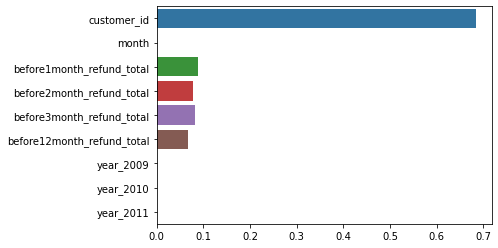

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


models=[ rf_reg]



for i,model in enumerate(models):

   
    model.fit(x_feature, y_target)
    feature_series=pd.Series(data=model.feature_importances_,index=x_feature.columns)
    features_series=feature_series.sort_values(ascending=False)
    sns.barplot(x=feature_series, y=feature_series.index)

- ### 회귀계수 시각화 

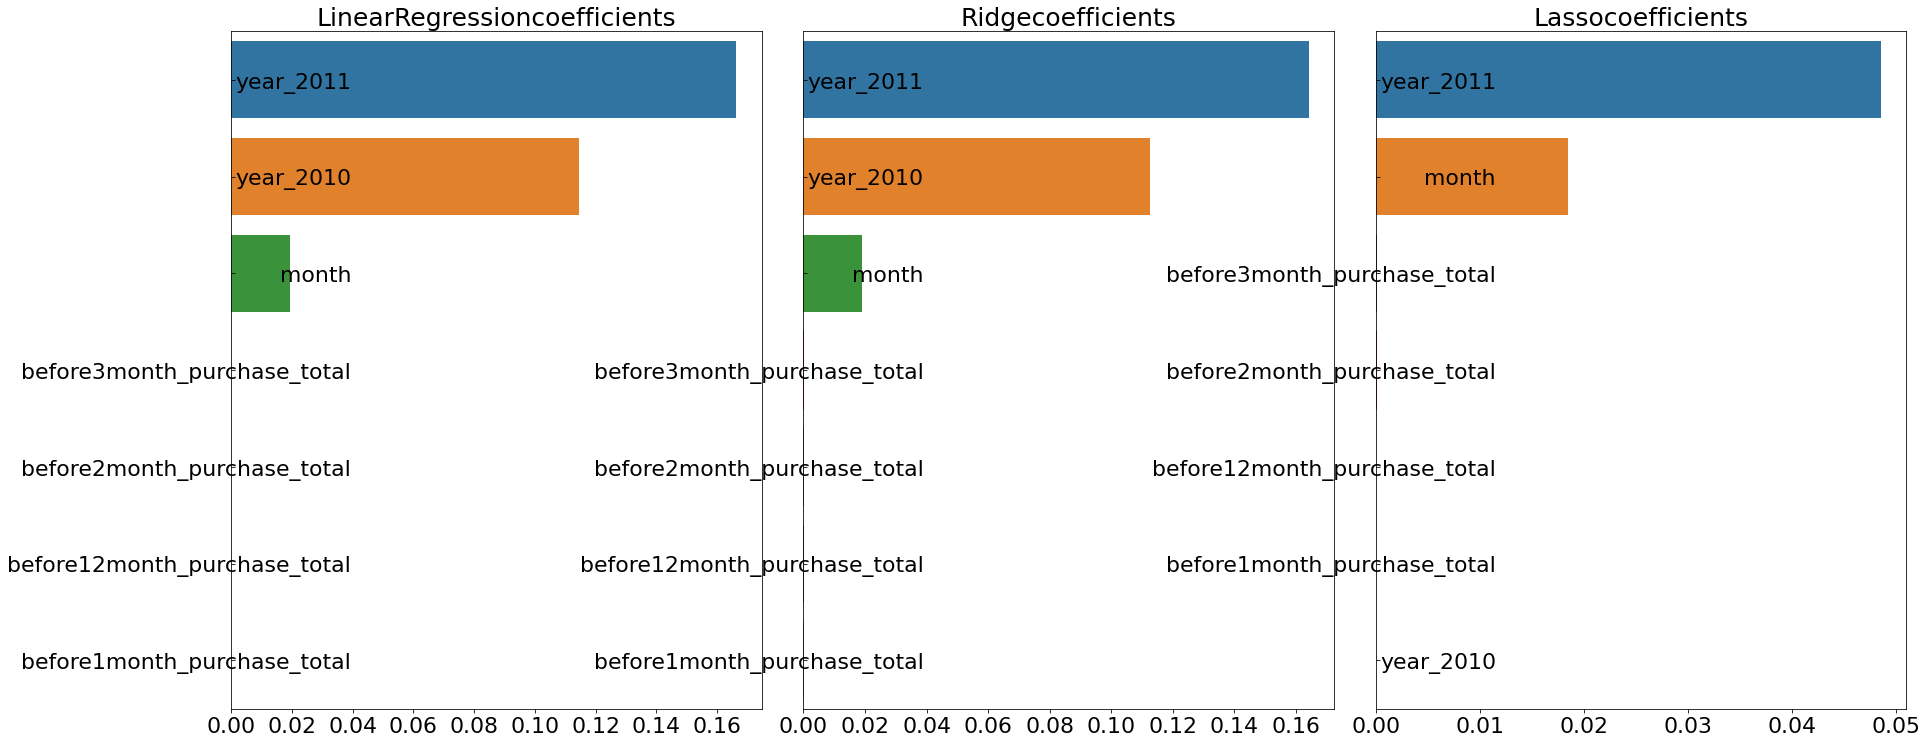

In [195]:
def get_top_bottom(model, n=7):
    coef=pd.Series(model.coef_, index=x_feature.columns)
    
    coef_high=coef.sort_values(ascending=False).head(n)
    return coef_high


def visualize_coefficient(models):
    fig, axs=plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        coef_high=get_top_bottom(model)
#         coef_conc

        axs[i_num].set_title(model.__class__.__name__+'coefficients',  size=25)
        axs[i_num].tick_params(axis="y",direction='in',pad=-120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_high.values, y=coef_high.index, ax=axs[i_num])
        
models=[lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- year변수의 계수가 너무 커서 원핫인코딩 진행해 주었음

- ### 릿지 라쏘 파라미터 최적화

In [178]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model=GridSearchCV(model, param_grid=params,
                           scoring='neg_mean_squared_error', cv=5)
    
    grid_model.fit(x_feature, y_target)
    rmse=np.sqrt(-1*grid_model.best_score_)
    print("{0}5CV시 최적 평균 RMSE값:{1}, 최적 alpha:{2}".format(model.__class__.__name__,
                                                        np.round(rmse,4),grid_model.best_params_))
    
    
ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)


Ridge5CV시 최적 평균 RMSE값:1.6575, 최적 alpha:{'alpha': 20}
Lasso5CV시 최적 평균 RMSE값:1.6575, 최적 alpha:{'alpha': 0.001}


- 결과대로 재모델링

In [194]:
#릿지
ridge_reg=Ridge(alpha=20)
ridge_reg.fit(x_feature, y_target)
ridge_pred=ridge_reg.predict(purchase_x_test)

#라쏘 
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_feature, y_target)
lasso_pred=lasso_reg.predict(purchase_x_test)


from sklearn.metrics import mean_squared_error
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value=preds[key]
        mse=mean_squared_error(purchase_y_test, pred_value)
        rmse=np.sqrt(mse)
        print("{0}모델의 RMSE:{1}".format(key, rmse))
        
# 모델 예측 / 평가
# models=[ ridge_reg, lasso_reg]
# get_model_cv_prediction(ridge_reg, x_feature, y_target)
# get_model_cv_prediction(lasso_reg, x_feature, y_target)
preds={'Ridge': ridge_pred,
      'Lasso':lasso_pred}

get_rmse_pred(preds)

# 좀 좋아진듯..?????

Ridge모델의 RMSE:1.3571320037136851
Lasso모델의 RMSE:1.3573829481815074


- ### 트리기반 모델 파라미터 최적화 

- 랜덤포레스트

In [200]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

# 모델 객체 생성 후 최적화 
rf_reg1=RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv=GridSearchCV(rf_reg1, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_feature, y_target)

print("최적 파라미터:", grid_cv.best_params_)

최적 파라미터: {'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 20, 'n_estimators': 100}


In [199]:
#최적 파라미터 적용 
rf_clf1=RandomForestRegressor(n_estimators=500, max_depth=6, min_samples_leaf=18,min_samples_split=20)
rf_clf1.fit(x_train, y_train)
# pred=rf_clf1.predict(purchase_x_test)
get_model_cv_prediction(m, purchase_x_test, purchase_y_test):

    


- GB 파라미터 최적화

In [201]:
params={
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}

grid_cv=GridSearchCV(gb_reg, param_grid=params, cv=2, verbose=1)
grid_cv.fit(x_feature, y_target)
print("최적 파라미터:", grid_cv.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   21.6s finished


최적 파라미터: {'learning_rate': 0.05, 'n_estimators': 100}


- DT파라미터 최적화


In [203]:
params={
    'max_depth':[6,8,10,12,16,20,24],
    'min_samples_split':[10,16,24]
}
grid_cv=GridSearchCV(dt_reg, param_grid=params, scoring='neg_mean_squared_error',cv=5,verbose=1)
grid_cv.fit(x_feature, y_target)
print("최적 파라미터:", grid_cv.best_params_)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


최적 파라미터: {'max_depth': 6, 'min_samples_split': 24}


[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    6.0s finished


- # purchase 최종 모델 

In [206]:
dt_reg_fin=DecisionTreeRegressor(random_state=0, max_depth=6, min_samples_split=24)
rf_reg_fin=RandomForestRegressor(n_estimators=1000, max_depth=6, min_samples_leaf=18,min_samples_split=20, random_state=0)
gb_reg_fin=GradientBoostingRegressor(random_state=0, n_estimators=100, learning_rate=0.05)

ridge_reg_fin=Ridge(alpha=20)
lasso_reg_fin=Lasso(alpha=0.001)


# refund 모델링

In [208]:
# dataset

refund_y_train=refund_test_set['refund_total']
refund_x_train=refund_test_set.drop(['refund_total'], axis=1, inplace=False)

refund_y_test=refund_test_set['refund_total']
refund_x_test=refund_test_set.drop(['refund_total'], axis=1, inplace=False)



- 트리기반

In [209]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# 모델 객체 생성 
dt_reg=DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg=RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000)


#트리기반 회귀 모델의 평가
models=[dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
    get_model_cv_prediction(model, refund_x_train,refund_y_train)

#### DecisionTreeRegressor ####
교차 검증의 평균 RMSE:1.586
#### RandomForestRegressor ####
교차 검증의 평균 RMSE:1.700
#### GradientBoostingRegressor ####
교차 검증의 평균 RMSE:1.892
#### XGBRegressor ####
교차 검증의 평균 RMSE:1.943
#### LGBMRegressor ####
교차 검증의 평균 RMSE:1.841


- 랜덤포레스트

In [210]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd 
import numpy as np 

#랜덤포레스트

##############################################33
# 데이터 로드 
y_target=refund_y_train
x_feature=refund_x_train

###############################################
# 랜덤포레스트 모델 
rf=RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores=cross_val_score(rf, x_feature, y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('교차 검증의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print(" 교차 검증 개별 RMSE scores:",np.round(rmse_scores,2))
print("교차 검증 평균 RMSE:{0:.3f}".format(avg_rmse))

교차 검증의 개별 Negative MSE scores: [-3.31 -2.62 -3.   -3.25 -2.33]
 교차 검증 개별 RMSE scores: [1.82 1.62 1.73 1.8  1.53]
교차 검증 평균 RMSE:1.700


- ### 선형회귀, 릿지, 라쏘 

In [211]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 모델학습
#선형회귀
lr_reg=LinearRegression()
lr_reg.fit(x_feature, y_target)

#릿지
ridge_reg=Ridge(alpha=8)
ridge_reg.fit(x_feature, y_target)

#라쏘 
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_feature, y_target)

# 모델 예측 / 평가
models=[lr_reg, ridge_reg, lasso_reg]
for model in models:
    get_model_cv_prediction(model, x_feature, y_target)

#### LinearRegression ####
교차 검증의 평균 RMSE:1.590
#### Ridge ####
교차 검증의 평균 RMSE:1.590
#### Lasso ####
교차 검증의 평균 RMSE:1.590


- #### 회귀계수 시각화 

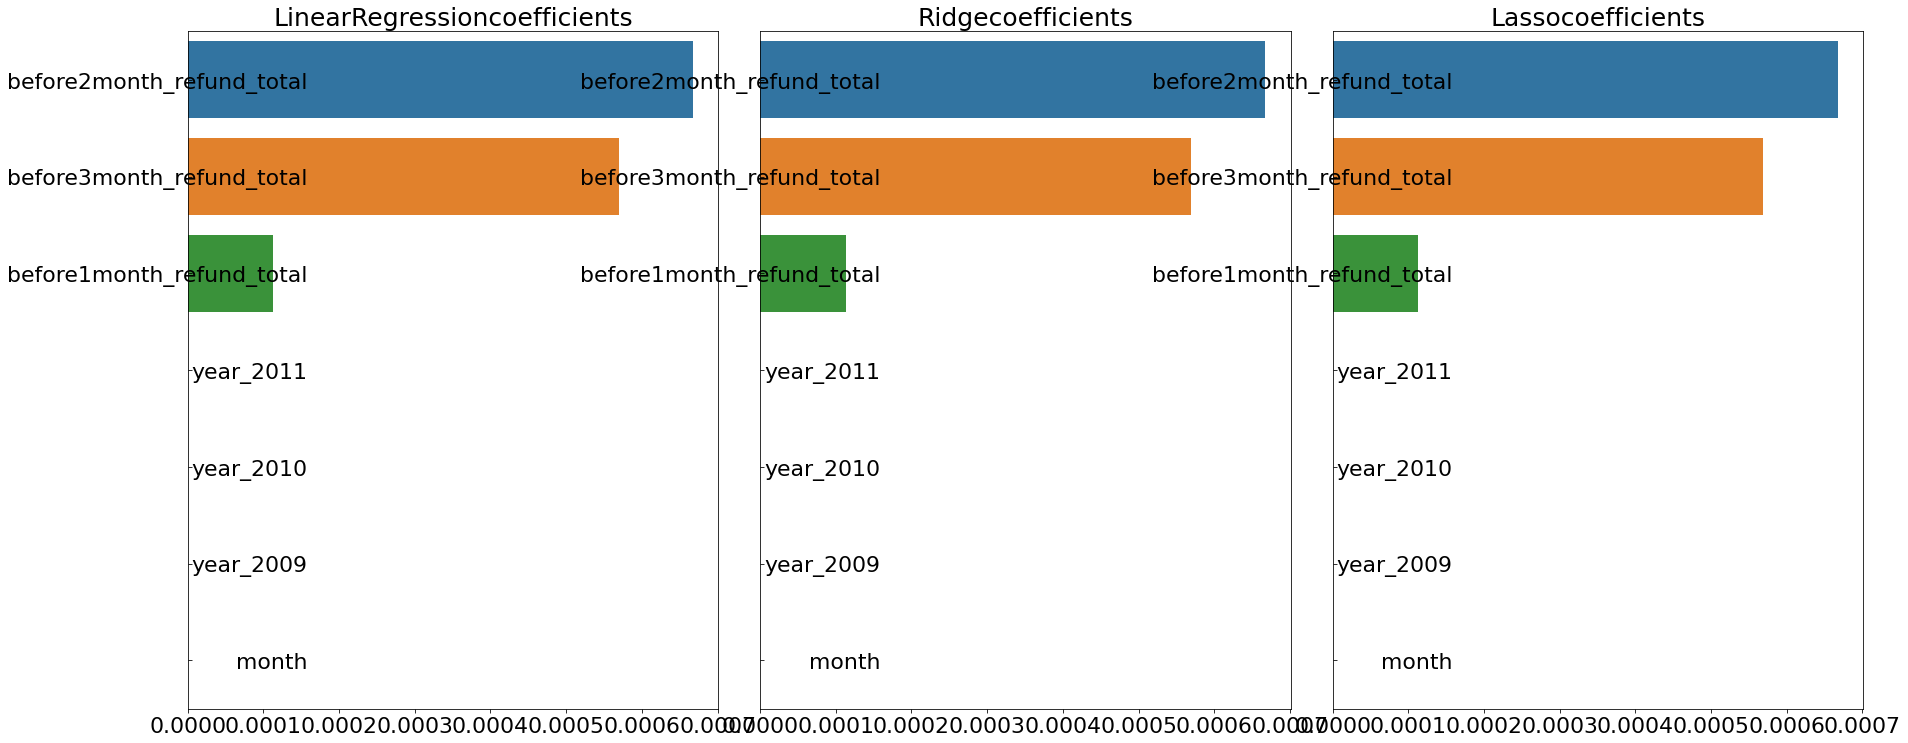

In [212]:
def get_top_bottom(model, n=7):
    coef=pd.Series(model.coef_, index=x_feature.columns)
    
    coef_high=coef.sort_values(ascending=False).head(n)
    return coef_high


def visualize_coefficient(models):
    fig, axs=plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        coef_high=get_top_bottom(model)
#         coef_conc

        axs[i_num].set_title(model.__class__.__name__+'coefficients',  size=25)
        axs[i_num].tick_params(axis="y",direction='in',pad=-120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_high.values, y=coef_high.index, ax=axs[i_num])
        
models=[lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- 릿지, 라쏘 하이퍼파라미터 최적화 

In [213]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model=GridSearchCV(model, param_grid=params,
                           scoring='neg_mean_squared_error', cv=5)
    
    grid_model.fit(x_feature, y_target)
    rmse=np.sqrt(-1*grid_model.best_score_)
    print("{0}5CV시 최적 평균 RMSE값:{1}, 최적 alpha:{2}".format(model.__class__.__name__,
                                                        np.round(rmse,4),grid_model.best_params_))
    
    
ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)


Ridge5CV시 최적 평균 RMSE값:1.5925, 최적 alpha:{'alpha': 20}
Lasso5CV시 최적 평균 RMSE값:1.5788, 최적 alpha:{'alpha': 10}


- ### 릿지, 라쏘 재모델링 

In [215]:
#릿지
ridge_reg=Ridge(alpha=20)
ridge_reg.fit(x_feature, y_target)
ridge_pred=ridge_reg.predict(refund_x_test)

#라쏘 
lasso_reg=Lasso(alpha=10)
lasso_reg.fit(x_feature, y_target)
lasso_pred=lasso_reg.predict(refund_x_test)


from sklearn.metrics import mean_squared_error
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value=preds[key]
        mse=mean_squared_error(refund_y_test, pred_value)
        rmse=np.sqrt(mse)
        print("{0}모델의 RMSE:{1}".format(key, rmse))
        
# 모델 예측 / 평가
# models=[ ridge_reg, lasso_reg]
# get_model_cv_prediction(ridge_reg, x_feature, y_target)
# get_model_cv_prediction(lasso_reg, x_feature, y_target)
preds={'Ridge': ridge_pred,
      'Lasso':lasso_pred}

get_rmse_pred(preds)

Ridge모델의 RMSE:1.555449661963685
Lasso모델의 RMSE:1.5562797625934148


- ### 트리기반 모델 하이퍼파라미터 최적화 

- 랜덤포레스트

In [216]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

# 모델 객체 생성 후 최적화 
rf_reg1=RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv=GridSearchCV(rf_reg1, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_feature, y_target)

print("최적 파라미터:", grid_cv.best_params_)

최적 파라미터: {'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 100}


In [218]:
#최적 파라미터 적용 
rf_reg_ref=RandomForestRegressor(n_estimators=500, max_depth=6, min_samples_leaf=18,min_samples_split=8)
rf_reg_ref.fit(x_feature, y_target)
# pred=rf_clf1.predict(purchase_x_test)
get_model_cv_prediction(rf_reg_ref, refund_x_test, refund_y_test)

    

#### RandomForestRegressor ####
교차 검증의 평균 RMSE:1.559


- GB

In [219]:
params={
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}

grid_cv=GridSearchCV(gb_reg, param_grid=params, cv=2, verbose=1)
grid_cv.fit(x_feature, y_target)
print("최적 파라미터:", grid_cv.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


최적 파라미터: {'learning_rate': 0.05, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s finished


- DT

In [220]:
params={
    'max_depth':[6,8,10,12,16,20,24],
    'min_samples_split':[10,16,24]
}
grid_cv=GridSearchCV(dt_reg, param_grid=params, scoring='neg_mean_squared_error',cv=5,verbose=1)
grid_cv.fit(x_feature, y_target)
print("최적 파라미터:", grid_cv.best_params_)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


최적 파라미터: {'max_depth': 8, 'min_samples_split': 16}


[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    0.4s finished


- ## refund 최종 모델 

In [221]:
# dt_reg_ref=DecisionTreeRegressor(random_state=0, max_depth=8, min_samples_split=16)
# rf_reg_ref=RandomForestRegressor(n_estimators=1000, max_depth=6, min_samples_leaf=18,min_samples_split=8, random_state=0)
# gb_reg_ref=GradientBoostingRegressor(random_state=0, n_estimators=100, learning_rate=0.05)

ridge_reg_ref=Ridge(alpha=20)
lasso_reg_ref=Lasso(alpha=10)


- ## purchase 최종 모델 

In [226]:
#모델 객체 생성

# dt_reg_fin=DecisionTreeRegressor(random_state=0, max_depth=6, min_samples_split=24)
# rf_reg_fin=RandomForestRegressor(n_estimators=1000, max_depth=6, min_samples_leaf=18,min_samples_split=20, random_state=0)
# gb_reg_fin=GradientBoostingRegressor(random_state=0, n_estimators=100, learning_rate=0.05)

ridge_reg_fin=Ridge(alpha=20)
lasso_reg_fin=Lasso(alpha=0.001)


- ## 최종 예측 수행 (?)

In [253]:
# 학습 데이터 로드 

purchase_y_train=purchase_train['purchase_total']
purchase_x_train=purchase_train.drop(['purchase_total','order_date_month'], axis=1, inplace=False)

refund_y_train=refund_train['refund_total']
refund_x_train=refund_train.drop(['refund_total','order_date_month'], axis=1, inplace=False)


In [255]:
refund_x_train.head()

,customer_id,month,before1month_refund_total,before2month_refund_total,before3month_refund_total,before12month_refund_total,year_2009,year_2010,year_2011
0,12346,12,-21342.255,-21342.255,-21342.255,-21342.255,1,0,0
1,12346,1,0.000,0.000,0.000,0.000,0,1,0
2,12346,3,0.000,170.775,0.000,0.000,0,1,0
3,12346,6,0.000,0.000,0.000,0.000,0,1,0
4,12346,10,0.000,0.000,0.000,0.000,0,1,0


In [229]:
# 예측할 데이터 
purchase=pd.read_csv("purchase_data.csv")
refund=pd.read_csv("refund_data.csv")

In [265]:
answer=pd.read_csv("answer.csv")

In [266]:
answer.head()

,customer_id,total,label
0,12346,0.000,0
1,12347,370.953,1
2,12348,0.000,0
3,12349,0.000,0
4,12350,0.000,0


In [225]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error


#개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하는 함수 

# 개별 모델이 k-fold로 설정된 폴드 세트 내부에서 원본의 학습데이터를 다시 추출해 학습와 예측을 수행한 뒤 그 결과를 저장
# 저장된 예측데이터는 추후에 메타 모델의 학습 피처 데이터로 이용됨 
# 개별 모델이 인자로 입력된 원본데이터를 예측한 뒤, 예측 결과 평균을 테스트 데이터로 사용

def get_stacking_base_datasets(model, x_train_n, y_train_n, x_test_n, n_folds):  #개별 기반 모델, 학습데이터, 테스트용 피처 데이터 
    
    #지정된 n_folds값으로 KFold생성 
    kf=KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred=np.zeros((x_train_n.shape[0],1)) #train길이만큼 배열만들기
    test_pred=np.zeros((x_test_n.shape[0],n_folds))  #test길이만큼(행), fold개수만큼(열) 배열 만들기 
    print(model.__class__.__name__,'model 시작')
    
    
    for forder_counter, (train_index, valid_index) in enumerate(kf.split(x_train_n)):     #kf.split--> train, test set을 나눠줌 
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드데이터 세트 추출 
        x_tr=x_train_n[train_index]  #학습용
        y_tr=y_train_n[train_index]
        x_te=x_train_n[valid_index]  #검증용 
        
    
        #폴드 세트 내부에서 다시 만들어진 학습데이터로 기반 모델의 학습 수행 
        model.fit(x_tr, y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 저장 
        train_fold_pred[valid_index,:]=model.predict(x_te).reshape(-1,1)  #만들어놨던 train길이의 배열에 예측값을 넣어줌 
        #입력된 원본 테스트 데이터를 폴드 데이터 세트 내 학습된 기반모델에서 예측후 저장
        test_pred[:,forder_counter]=model.predict(x_test_n) #만들어 놨던 test길이의 배열에 검증 데이터 예측값을 넣어줌 
        
        
    #폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 저장
    test_pred_mean=np.mean(test_pred,axis=1).reshape(-1,1)
    
    
    #train_fold_pred(-->train으로 예측한 값) : 최종 메타 모델이 사용하는 학습데이터
    #test_pred_mean(-->test로 예측한 값을 평균한 값) : 테스트 데이터 
   
    return train_fold_pred, test_pred_mean

### 1. purchase

In [281]:
#get_stacking_base_datasets()는 넘파이 adarray를 인자로 사용하므로 DataFrame을 넘파이로 변환 
x_train_n=purchase_x_train.values
x_test_n=purchase.values
y_train_n=purchase_y_train.values


ridge_train, ridge_test=get_stacking_base_datasets(ridge_reg_fin, x_train_n,y_train_n, x_test_n,5)
lasso_train, lasso_test=get_stacking_base_datasets(lasso_reg_fin, x_train_n,y_train_n, x_test_n,5)
# df_train, df_test=get_stacking_base_datasets(dt_reg_fin, x_train_n,y_train_n, x_test_n,5)
# rf_train, rf_test=get_stacking_base_datasets(rf_reg_fin, x_train_n,y_train_n, x_test_n,5)
# gb_train, gb_test=get_stacking_base_datasets(gb_reg_fin, x_train_n,y_train_n, x_test_n,5)




Ridge model 시작
Lasso model 시작


In [282]:
# stack_final_x_train=np.concatenate((ridge_train, lasso_train, df_train, rf_train, gb_train),axis=1)
# stack_final_x_test=np.concatenate((ridge_test, lasso_test, df_test, rf_test, gb_test ), axis=1)
stack_final_x_train=np.concatenate((ridge_train, lasso_train),axis=1)
stack_final_x_test=np.concatenate((ridge_test, lasso_test), axis=1)


#최종 메타 모델
meta_model_lasso=Lasso(alpha=0.0005)


#개별 모델 예측값을 바탕으로 새롭게 만들어진 학습/테스트 데이터로 메타모델 예측 및 RMSE 측정 
meta_model_lasso.fit(stack_final_x_train, purchase_y_train)
final_purchase=meta_model_lasso.predict(stack_final_x_test)


In [283]:
final_purchase

array([6.20099979, 6.3699463 , 6.30423424, ..., 6.06956231, 6.06954018,
       6.16439185])

## 2. refund

In [284]:
x_train_n=refund_x_train.values
x_test_n=refund.values
y_train_n=refund_y_train.values


ridge_train, ridge_test=get_stacking_base_datasets(ridge_reg_ref, x_train_n,y_train_n, x_test_n,5)
lasso_train, lasso_test=get_stacking_base_datasets(lasso_reg_ref, x_train_n,y_train_n, x_test_n,5)
# df_train, df_test=get_stacking_base_datasets(dt_reg_ref, x_train_n,y_train_n, x_test_n,5)
# rf_train, rf_test=get_stacking_base_datasets(rf_reg_ref, x_train_n,y_train_n, x_test_n,5)
# gb_train, gb_test=get_stacking_base_datasets(gb_reg_ref, x_train_n,y_train_n, x_test_n,5)



Ridge model 시작
Lasso model 시작


In [285]:
# stack_final_x_train=np.concatenate((ridge_train, lasso_train, df_train, rf_train, gb_train),axis=1)
# stack_final_x_test=np.concatenate((ridge_test, lasso_test, df_test, rf_test, gb_test ), axis=1)
stack_final_x_train=np.concatenate((ridge_train, lasso_train),axis=1)
stack_final_x_test=np.concatenate((ridge_test, lasso_test), axis=1)

#최종 메타 모델
meta_model_lasso=Lasso(alpha=0.0005)


#개별 모델 예측값을 바탕으로 새롭게 만들어진 학습/테스트 데이터로 메타모델 예측 및 RMSE 측정 
meta_model_lasso.fit(stack_final_x_train, refund_y_train)
final_refund=meta_model_lasso.predict(stack_final_x_test)


In [286]:
final_refund

array([0.85765665, 0.85761609, 0.85757553, ..., 0.61675893, 0.61671837,
       0.61667781])

In [267]:
answer.head()

,customer_id,total,label
0,12346,0.000,0
1,12347,370.953,1
2,12348,0.000,0
3,12349,0.000,0
4,12350,0.000,0


In [288]:
answer['log_purchase']=final_purchase
answer['log_refund']=final_refund

In [289]:
answer.head()

,customer_id,total,label,log_purchase,log_refund,purchase,refund
0,12346,0.000,0,6.201000,0.857657,492.241935,1.357629
1,12347,370.953,1,6.369946,0.857616,583.026466,1.357534
2,12348,0.000,0,6.304234,0.857576,545.882646,1.357438
3,12349,0.000,0,6.230448,0.857535,506.982879,1.357343
4,12350,0.000,0,6.200911,0.857494,492.198272,1.357247


- ### 로그 변환 되어 있던걸 다시 스케일 변환 

In [287]:
answer['purchase']=np.expm1(final_purchase)
answer['refund']=np.expm1(final_refund)

In [276]:
answer.head(50)

,customer_id,total,label,log_purchase,log_refund,purchase,refund
0,12346,0.0000,0,5.994547,0.997815,400.234752,1.712350
1,12347,370.9530,1,5.979434,0.662904,394.216583,0.940418
2,12348,0.0000,0,6.396972,0.662895,599.025382,0.940403
3,12349,0.0000,0,5.152104,0.662887,171.794729,0.940387
4,12350,0.0000,0,6.193653,0.662879,488.631702,0.940371
5,12351,0.0000,0,6.193652,0.662871,488.630822,0.940356
6,12352,0.0000,0,5.684139,0.662863,293.164443,0.940340
7,12353,0.0000,0,6.193648,0.662584,488.629061,0.939798
8,12354,0.0000,0,6.193728,0.662576,488.668093,0.939782
9,12355,0.0000,0,6.193726,0.662568,488.667213,0.939767


In [290]:
answer['total']=np.expm1(final_purchase)+np.expm1(final_refund)

In [292]:
answer.head(30)

,customer_id,total,label,log_purchase,log_refund,purchase,refund
0,12346,493.599564,0,6.201000,0.857657,492.241935,1.357629
1,12347,584.383999,1,6.369946,0.857616,583.026466,1.357534
2,12348,547.240084,0,6.304234,0.857576,545.882646,1.357438
3,12349,508.340221,0,6.230448,0.857535,506.982879,1.357343
4,12350,493.555519,0,6.200911,0.857494,492.198272,1.357247
5,12351,493.544509,0,6.200889,0.857454,492.187357,1.357151
6,12352,532.842340,0,6.277555,0.857413,531.485284,1.357056
7,12353,493.522488,0,6.200845,0.857373,492.165528,1.356960
8,12354,493.511478,0,6.200823,0.857332,492.154614,1.356865
9,12355,493.500469,0,6.200801,0.857292,492.143700,1.356769
